In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import os

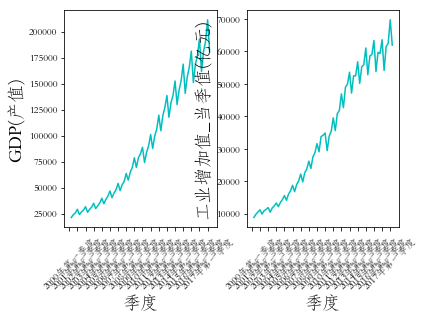

In [2]:
#==============================================================================
# 6.1 subplot应用
#==============================================================================
# 读取相关数据
GDP_data = pd.read_excel('国民经济核算季度数据.xlsx')
GDP = pd.read_excel('Province GDP 2017.xlsx')
Titanic = pd.read_csv('titanic_train.csv')
Titanic.dropna(subset=['Age'], inplace=True)
iris = pd.read_csv('iris.csv')
# 设置绘图区域
plt.subplot(121) # 位置
plt.plot(GDP_data['序号'],GDP_data['国内生产总值_当季值(亿元)'],c= 'c')
plt.xlabel("季度",fontsize=18)
plt.ylabel('GDP(产值)',fontsize=18)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
plt.subplot(122)
plt.plot(GDP_data['序号'],GDP_data['工业增加值_当季值(亿元)'],c= 'c')
plt.xlabel("季度",fontsize=18)
plt.ylabel('工业增加值_当季值(亿元)',fontsize=18)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
plt.show()

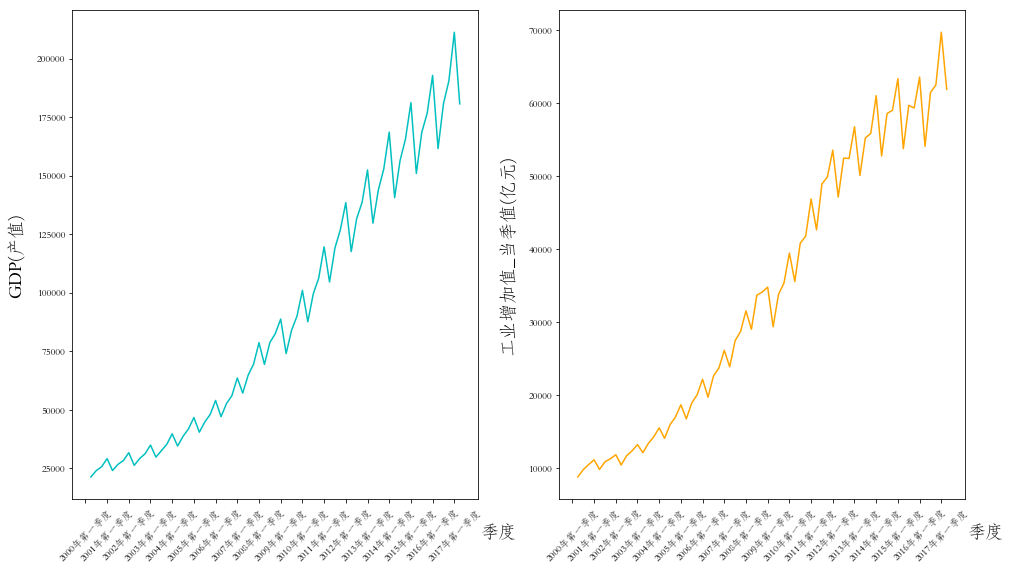

In [3]:
# 第二种方式
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(121)
ax1.plot(GDP_data['序号'],GDP_data['国内生产总值_当季值(亿元)'],c= 'c')
ax1.set_xlabel("季度",fontsize=18)
ax1.set_ylabel('GDP(产值)',fontsize=18,labelpad =12)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax1.xaxis.set_label_coords(1.05,-0.05)
# 设置第二幅图位置
ax2 = fig.add_subplot(122)
ax2.plot(GDP_data['序号'],GDP_data['工业增加值_当季值(亿元)'],c= 'orange')
ax2.set_xlabel("季度",fontsize=18)
ax2.set_ylabel('工业增加值_当季值(亿元)',fontsize=18,labelpad =12)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax2.xaxis.set_label_coords(1.05,-0.05)
plt.show()

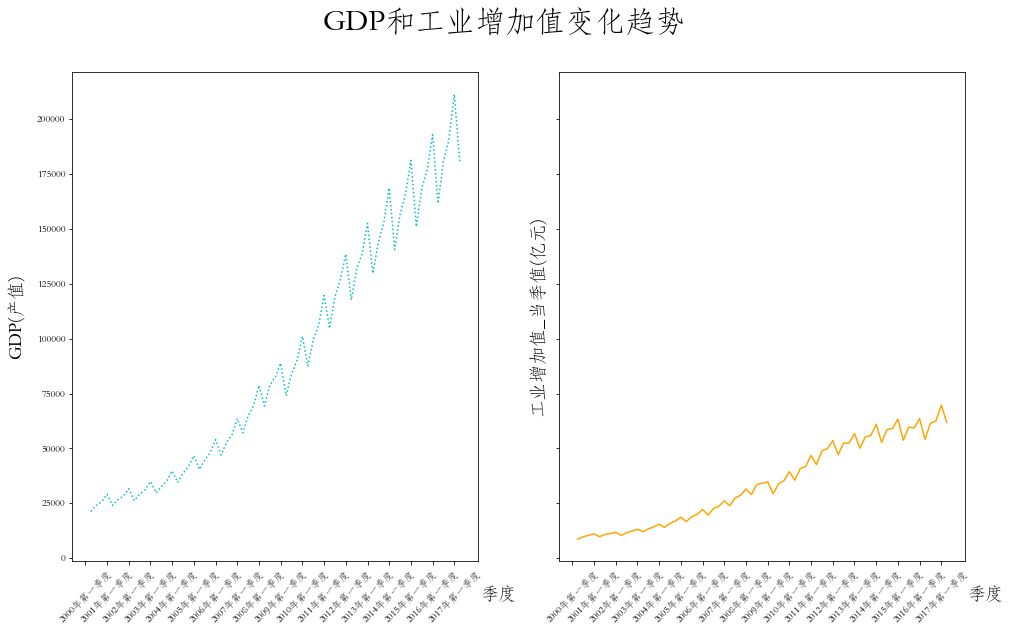

In [4]:
# 第三种方式
font_style = dict(fontsize=30,weight='black')
fig, ax = plt.subplots(1,2,sharey=True,figsize=(16,9))
# subplot(121)
ax1 = ax[0]
# ax1 = fig.add_subplot(121)
ax1.plot(GDP_data['序号'],GDP_data['国内生产总值_当季值(亿元)'],c= 'c',ls=":")
ax1.set_xlabel("季度",fontsize=18)
ax1.set_ylabel('GDP(产值)',fontsize=18,labelpad =12)
ax1.set_xticks(range(0,69,4))  # 位置
ax1.set_xticklabels(GDP_data.iloc[range(0,69,4),1],rotation=45)
ax1.xaxis.set_label_coords(1.05,-0.05)
# 设置第二幅图位置
ax2 = ax[1]
#ax2 = fig.add_subplot(122)
ax2.plot(GDP_data['序号'],GDP_data['工业增加值_当季值(亿元)'],c= 'orange')
ax2.set_xlabel("季度",fontsize=18)
ax2.set_ylabel('工业增加值_当季值(亿元)',fontsize=18,labelpad =12)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax2.xaxis.set_label_coords(1.05,-0.05)
plt.suptitle('GDP和工业增加值变化趋势',**font_style)
plt.show()

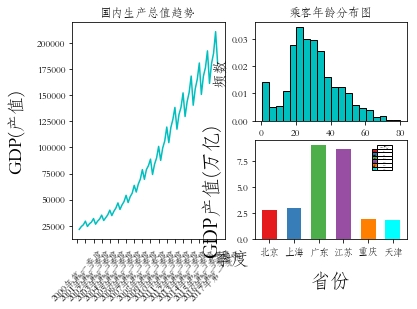

In [5]:
# # # 在非等分画布的绘图区域上实现图形展示
# 读取Titanic数据
Titanic = pd.read_csv('titanic_train.csv')
Titanic.dropna(subset=['Age'], inplace=True)
#作图
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(GDP_data['序号'],GDP_data['国内生产总值_当季值(亿元)'],c= 'c')
ax1.set_xlabel("季度",fontsize=18)
ax1.set_ylabel('GDP(产值)',fontsize=18,labelpad =12)
plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax1.xaxis.set_label_coords(1.05,-0.05) # 调整标签位置
ax1.set_title('国内生产总值趋势')
# 设置位置
ax2 = fig.add_subplot(222)
ax2.hist(x = Titanic.Age, bins=20,color='c',edgecolor ='black',density=True)
ax2.set_xlabel('年龄',fontsize =15)
ax2.set_ylabel('频数',fontsize =15)
ax2.set_title('乘客年龄分布图')
# 设置位置
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
ax3 = fig.add_subplot(224)
ax3.bar(GDP.index.values,GDP.GDP,width=0.6,align='center',color= colors,
        tick_label=GDP.Province)
ax3.set_xlabel('省份',fontsize = 20,labelpad =15)
ax3.set_ylabel('GDP产值(万亿)',fontsize = 20,labelpad =15)
# 添加表格
col_labels = ['GDP(万亿)']
row_labels = GDP.Province
table_vals = np.array(GDP.GDP.values).reshape(-1,1)
col_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
my_table = plt.table(cellText=table_vals,cellLoc='center' ,colWidths=[0.1] * 6,
   rowLabels=row_labels, colLabels=col_labels,rowColours=col_colors,bbox=[0.8,0.7,0.1,0.25])
# 显示
plt.show()

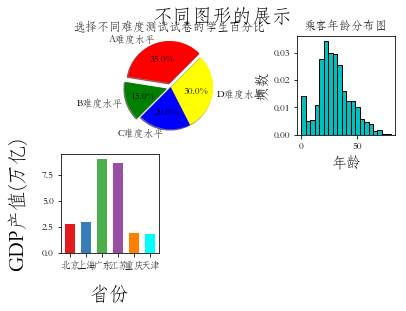

In [6]:
#==============================================================================
# 6.2 subplot2grid应用
#==============================================================================
# 案例
# 本案例中将绘图区域划分为6个子区
labels =["A难度水平",'B难度水平','C难度水平','D难度水平']
students = [0.35,0.15,0.20,0.30]
colors = ['red','green','blue','yellow']
explode = (0.1,0.1,0,0)
plt.subplot2grid((2,3),(0,0),colspan=2) #设置绘图区域
plt.pie(students,explode = explode,labels =labels,autopct='%1.1f%%',startangle=45,shadow=True,
        colors=colors)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('选择不同难度测试试卷的学生百分比')
# 设置位置
plt.subplot2grid((2,3),(0,2)) #设置绘图区域
plt.hist(x = Titanic.Age, bins=20,color='c',edgecolor ='black',density=True)
plt.xlabel('年龄',fontsize =15)
plt.ylabel('频数',fontsize =15)
plt.title('乘客年龄分布图')
# 设置位置
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
plt.subplot2grid((2,3),(1,0)) #设置绘图区域
plt.bar(GDP.index.values,GDP.GDP,width=0.6,align='center',color= colors,
        tick_label=GDP.Province)
plt.xlabel('省份',fontsize = 20,labelpad =15)
plt.ylabel('GDP产值(万亿)',fontsize = 20,labelpad =15)
# 添加表格
col_labels = ['GDP(万亿)']
row_labels = GDP.Province
table_vals =np.array(GDP.GDP.values).reshape(-1,1)
col_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
# 显示
plt.suptitle('不同图形的展示',size=20)
plt.show()

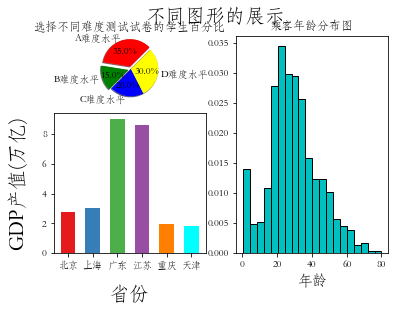

In [7]:
# # # # # #
# 本案例中将绘图区域划分为6个子区
labels =["A难度水平",'B难度水平','C难度水平','D难度水平']
students = [0.35,0.15,0.20,0.30]
colors = ['red','green','blue','yellow']
explode = (0.1,0.1,0,0)
plt.subplot2grid((3,2),(0,0)) #设置绘图区域
plt.pie(students,explode = explode,labels =labels,autopct='%1.1f%%',startangle=45,shadow=True,
        colors=colors)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('选择不同难度测试试卷的学生百分比')
# 设置位置
plt.subplot2grid((3,2),(0,1),rowspan=3) #设置绘图区域
plt.hist(x = Titanic.Age, bins=20,color='c',edgecolor ='black',density=True)
plt.xlabel('年龄',fontsize =15)
plt.ylabel('频数',fontsize =15)
plt.title('乘客年龄分布图')
# 设置位置
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
plt.subplot2grid((3,2),(1,0),rowspan=2) #设置绘图区域
plt.bar(GDP.index.values,GDP.GDP,width=0.6,align='center',color= colors,
        tick_label=GDP.Province)
plt.xlabel('省份',fontsize = 20,labelpad =15)
plt.ylabel('GDP产值(万亿)',fontsize = 20,labelpad =15)
# 添加表格
col_labels = ['GDP(万亿)']
row_labels = GDP.Province
table_vals = np.array(GDP.GDP.values).reshape(-1,1)
col_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
# 显示
plt.suptitle('不同图形的展示',size=20)
plt.show()

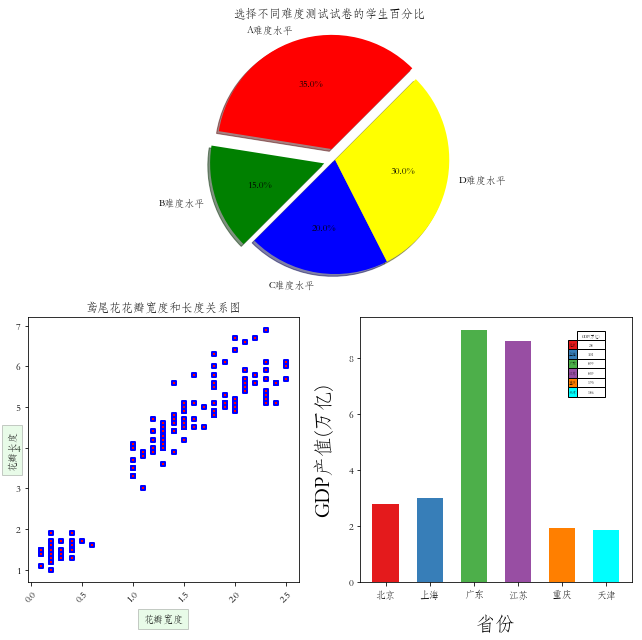

In [8]:
#==============================================================================
# 6.3 使用gridspec类
#==============================================================================
from matplotlib.gridspec import GridSpec
labels =["A难度水平",'B难度水平','C难度水平','D难度水平']
students = [0.35,0.15,0.20,0.30]
colors = ['red','green','blue','yellow']
explode = (0.1,0.1,0,0)
box = {'facecolor':'lightgreen','pad':5,'alpha':0.2}
fig = plt.figure(figsize=(9,9))
gs = GridSpec(2,2) #相当于两行两列
ax1 = fig.add_subplot(gs[0,:]) #绘制在第一行
ax1.pie(students,explode = explode,labels =labels,autopct='%1.1f%%',startangle=45,shadow=True,
        colors=colors)
ax1.axis('equal')
ax1.set_title('选择不同难度测试试卷的学生百分比')
# 第二个子图位置
ax2 = fig.add_subplot(gs[1,0]) #绘制在第2行和第一列
ax2.scatter(x = iris.Petal_Width,y = iris.Petal_Length,s =20,marker='s',lw=2,
            color ='red',edgecolors='b')
ax2.set_xlabel('花瓣宽度',bbox =box)
ax2.set_ylabel('花瓣长度',bbox =box)
ax2.set_title('鸢尾花花瓣宽度和长度关系图')
for ticklabel in ax2.get_xticklabels():
    ticklabel.set_rotation(45)
ax2.yaxis.set_label_coords(-0.04,0.5)
ax2.xaxis.set_label_coords(0.5,-0.12)
# 第三个子图位置
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
ax3 = fig.add_subplot(gs[1,1]) #绘制在第2行和第2列
ax3.bar(GDP.index.values,GDP.GDP,width=0.6,align='center',color= colors,
        tick_label=GDP.Province)
ax3.set_xlabel('省份',fontsize = 20,labelpad =15)
ax3.set_ylabel('GDP产值(万亿)',fontsize = 20,labelpad =15)
# 添加表格
col_labels = ['GDP(万亿)']
row_labels = GDP.Province
table_vals = np.array(GDP.GDP.values).reshape(-1,1)
col_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
my_table = plt.table(cellText=table_vals,cellLoc='center' ,colWidths=[0.1] * 6,
   rowLabels=row_labels, colLabels=col_labels,rowColours=col_colors,bbox=[0.8,0.7,0.1,0.25])
# 显示
gs.tight_layout(fig) #控制子图参数的
plt.show()